In [ ]:
import keras
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_excel('creditdatatraining.xlsx')
df = df.drop(['Value-Savings-Stocks','Duration-in-Current-address','Telephone','Age-years', 'Occupation', 'Foreign-Worker'], axis=1)
df.shape

(500, 14)

 #Explore the data

In [ ]:
df.describe()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Type-of-apartment,No-of-dependents
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,21.43400,3199.980000,3.010000,2.360000,1.928000,1.14600
std,12.30742,2831.386861,1.113724,1.064268,0.539814,0.35346
min,4.00000,276.000000,1.000000,1.000000,1.000000,1.00000
25%,12.00000,1357.250000,2.000000,1.000000,2.000000,1.00000
50%,18.00000,2236.500000,3.000000,3.000000,2.000000,1.00000
75%,24.00000,3941.500000,4.000000,3.000000,2.000000,1.00000
max,60.00000,18424.000000,4.000000,4.000000,3.000000,2.00000


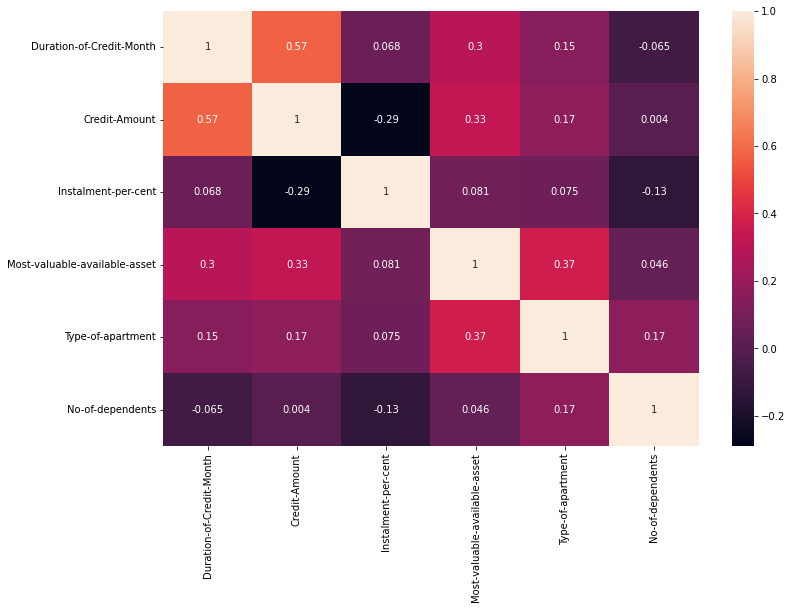

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)

We noticed a strong correlation between "Duration-of-Credit-Month" the "Credit-Amount" feature. We'll explore this features further.

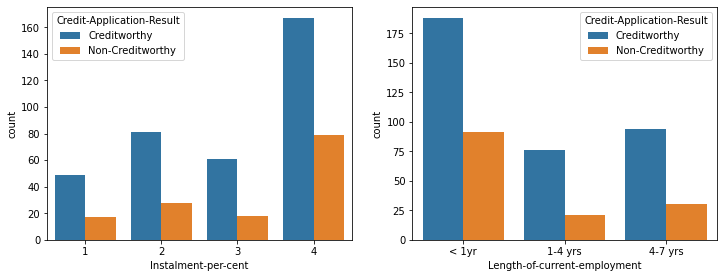

In [ ]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='Instalment-per-cent', data=df, hue='Credit-Application-Result')

plt.subplot(6, 2, 2)
sns.countplot(x='Length-of-current-employment', data=df, hue='Credit-Application-Result')


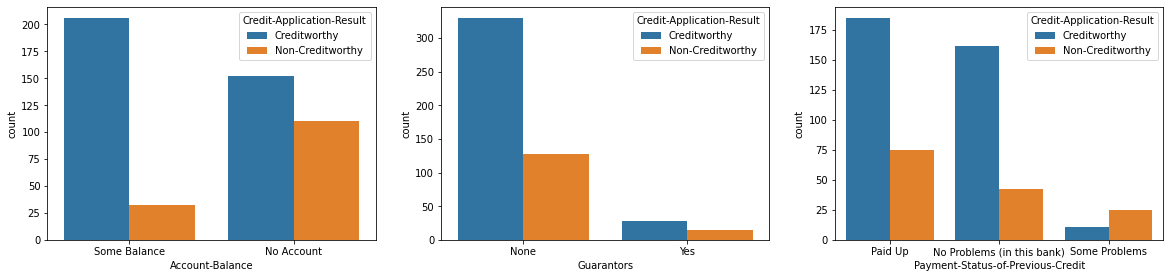

In [ ]:
#Account-Balance
plt.figure(figsize=(20, 30))
plt.subplot(6, 3, 1)
sns.countplot(x='Account-Balance', data=df, hue='Credit-Application-Result')
#Guarantors
plt.subplot(6, 3, 2)
sns.countplot(x='Guarantors', data=df, hue='Credit-Application-Result')
#Payment-Status-of-Previous-Credit
plt.subplot(6, 3, 3)
sns.countplot(x='Payment-Status-of-Previous-Credit', data=df, hue='Credit-Application-Result')

#Data

In [ ]:
df.columns

Index(['Credit-Application-Result', 'Account-Balance',
       'Duration-of-Credit-Month', 'Payment-Status-of-Previous-Credit',
       'Purpose', 'Credit-Amount', 'Length-of-current-employment',
       'Instalment-per-cent', 'Guarantors', 'Most-valuable-available-asset',
       'Concurrent-Credits', 'Type-of-apartment', 'No-of-Credits-at-this-Bank',
       'No-of-dependents'],
      dtype='object')

In [ ]:
df = df.rename(columns = {'Credit-Application-Result': 'Credit_Application_Result', 'Account-Balance': 'Account_Balance', 'Duration-of-Credit-Month':'Duration_of_Credit_Month','Payment-Status-of-Previous-Credit':'Payment_Status_of_Previous_Credit','Credit-Amount':'Credit_Amount','Length-of-current-employment':'Length_of_current_employment','Instalment-per-cent':'Instalment','Most-valuable-available-asset':'available_asset','Concurrent-Credits':'Concurrent_Credits','Type-of-apartment':'Type_of_apartment','No-of-Credits-at-this-Bank':'Credits_at_this-Bank','No-of-dependents':'dependents' }, inplace = False)

In [ ]:
df.columns

Index(['Credit_Application_Result', 'Account_Balance',
       'Duration_of_Credit_Month', 'Payment_Status_of_Previous_Credit',
       'Purpose', 'Credit_Amount', 'Length_of_current_employment',
       'Instalment', 'Guarantors', 'available_asset', 'Concurrent_Credits',
       'Type_of_apartment', 'Credits_at_this-Bank', 'dependents'],
      dtype='object')

In [ ]:
#Credit_Application_Result
x = df
y =  pd.DataFrame(x['Credit_Application_Result'].apply(lambda x: 1 if x=='Creditworthy' else 0))
x = x.drop(['Credit_Application_Result'], axis=1)
x = pd.get_dummies(x)

#Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
#train, test = train_test_split(x, test_size=0.33, random_state=42)
#train, test = train_test_split(y, test_size=0.33, random_state=42)
#print(train.shape)
#print(test.shape)

In [ ]:

#X_train, y_train = train.drop('Credit_Application_Result', axis=1), train.Credit_Application_Result
#X_test, y_test = test.drop('Credit_Application_Result', axis=1), test.Credit_Application_Result

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)

xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

#print_score(y_train, y_train_pred, train=True)
#print_score(y_test, y_test_pred, train=False)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import plot_confusion_matrix , classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.62      0.40      0.49        50
           1       0.75      0.88      0.81       100

    accuracy                           0.72       150
   macro avg       0.69      0.64      0.65       150
weighted avg       0.71      0.72      0.70       150



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


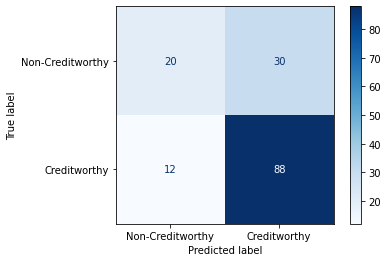

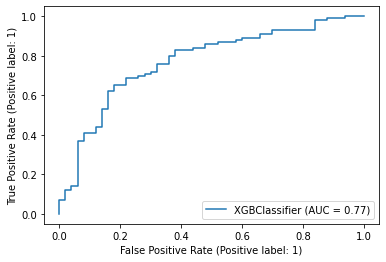

In [ ]:

disp = plot_confusion_matrix(
    xgb_clf, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Non-Creditworthy', 'Creditworthy']
)

disp = plot_roc_curve(xgb_clf, X_test, y_test)